## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [16]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow import keras

**QUESTION:** Load dataset and display some lines of the csv file.

In [2]:
#On charge le dataset 
dataset_path = "ai4i2020.csv"
df = pd.read_csv(dataset_path)

# On affiche les premières lignes du dataset
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

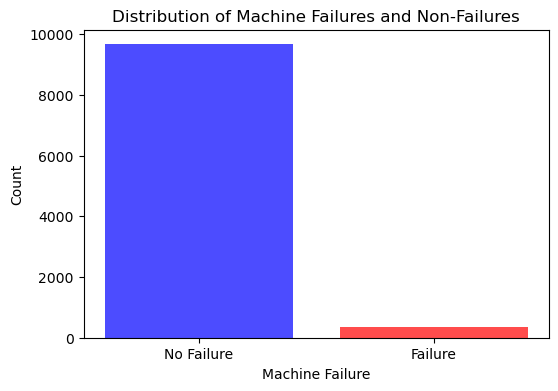

In [3]:
# On compte le nombre de pannes et de non-pannes
failure_counts = df["Machine failure"].value_counts()

# On affiche la distribution sous forme de barres
plt.figure(figsize=(6,4))
plt.bar(["No Failure", "Failure"], failure_counts, alpha=0.7, color=['blue', 'red'])
plt.xlabel("Machine Failure")
plt.ylabel("Count")
plt.title("Distribution of Machine Failures and Non-Failures")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

Il y a un déséquilibre important entre les machines en panne et celles qui ne le sont pas. 

La grande majorité des machines ne sont pas tombées en panne (en bleu). Seule une petite fraction des machines a connu des défaillances (en rouge).

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Le déséquilibre dans l'ensemble de données aura un impact négatif sur la capacité du modèle à apprendre et à se généraliser correctement. 

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

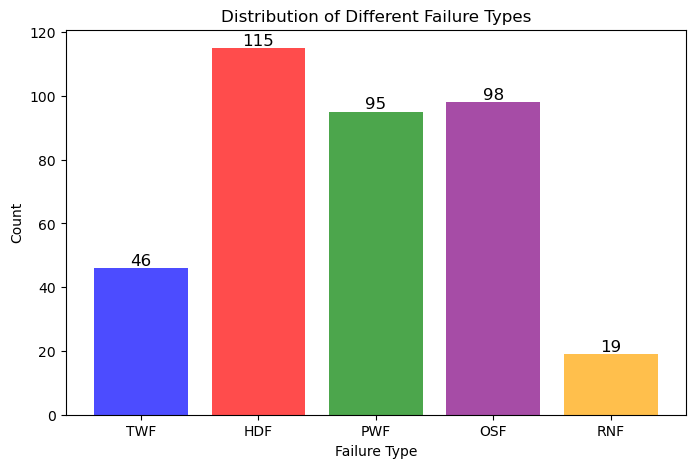

In [4]:
# On compte le nombre d'occurrences de chaque type de panne
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
failure_counts = df[failure_types].sum()

plt.figure(figsize=(8,5))
bars = plt.bar(failure_counts.index, failure_counts.values, alpha=0.7, color=['blue', 'red', 'green', 'purple', 'orange'])

# valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Distribution of Different Failure Types")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

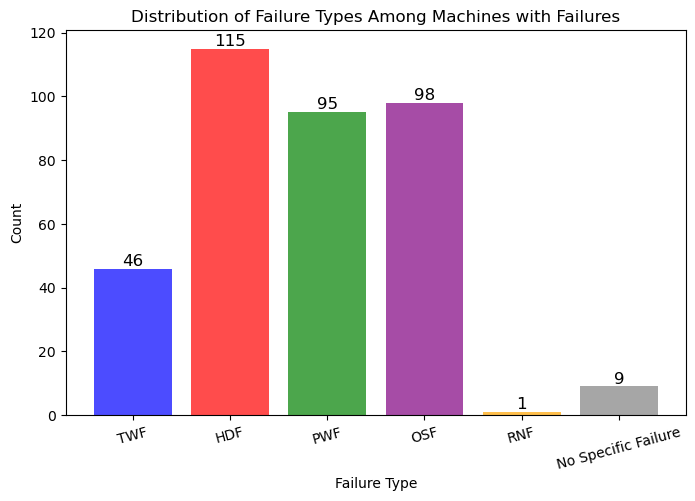

In [5]:
# Filtrer uniquement les machines qui ont eu une panne (Machine failure == 1)
failed_machines = df[df["Machine failure"] == 1]

# On compte les occurrences de chaque type de panne
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
failure_counts = failed_machines[failure_types].sum()

# On ajoute la catégorie "No Specific Failure" (cas où Machine failure == 1 mais aucune panne spécifique)
no_specific_failure_count = (failed_machines[failure_types].sum(axis=1) == 0).sum()
failure_counts["No Specific Failure"] = no_specific_failure_count

# bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(failure_counts.index, failure_counts.values, alpha=0.7, color=['blue', 'red', 'green', 'purple', 'orange', 'gray'])

# On ajoute les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Distribution of Failure Types Among Machines with Failures")
plt.xticks(rotation=15)  
plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [6]:
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

"Write your response here"

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [7]:

X = df.drop(columns=["Product ID", "Type", "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"])  # suppression des colonnes non pertinentes
Y = df["Machine failure"]  # colonne cible

# jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# nombre d'éléments dans chaque ensemble
print("Number of elements in each dataset:")
print(f"X_train: {len(X_train)}")
print(f"Y_train: {len(Y_train)}")
print(f"X_test: {len(X_test)}")
print(f"Y_test: {len(Y_test)}")




Number of elements in each dataset:
X_train: 8000
Y_train: 8000
X_test: 2000
Y_test: 2000


**QUESTION** Code below the model architecture

In [25]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # premiere couche cachée avec 64 neurones
    keras.layers.Dropout(0.2),  # dropout pour éviter l'overfitting
    keras.layers.Dense(32, activation='relu'),  # deuxieme couche cachée avec 32 neurones
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),  # troisieme couche cachée avec 16 neurones
    keras.layers.Dense(1, activation='sigmoid')  # couche de sortie (prédiction binaire)
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7979 - loss: 61.9156 - val_accuracy: 0.9660 - val_loss: 3.0659
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9180 - loss: 4.8264 - val_accuracy: 0.9660 - val_loss: 1.7118
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9177 - loss: 2.3643 - val_accuracy: 0.9660 - val_loss: 0.2393
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9461 - loss: 0.9984 - val_accuracy: 0.9660 - val_loss: 0.1875
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9621 - loss: 0.4349 - val_accuracy: 0.9660 - val_loss: 0.2201
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9611 - loss: 0.3564 - val_accuracy: 0.9660 - val_loss: 0.1811
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9630 - loss: 0.2469 - val_accuracy: 0.9660 - val_loss: 0.1775
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9642 - loss: 0.2789 - v

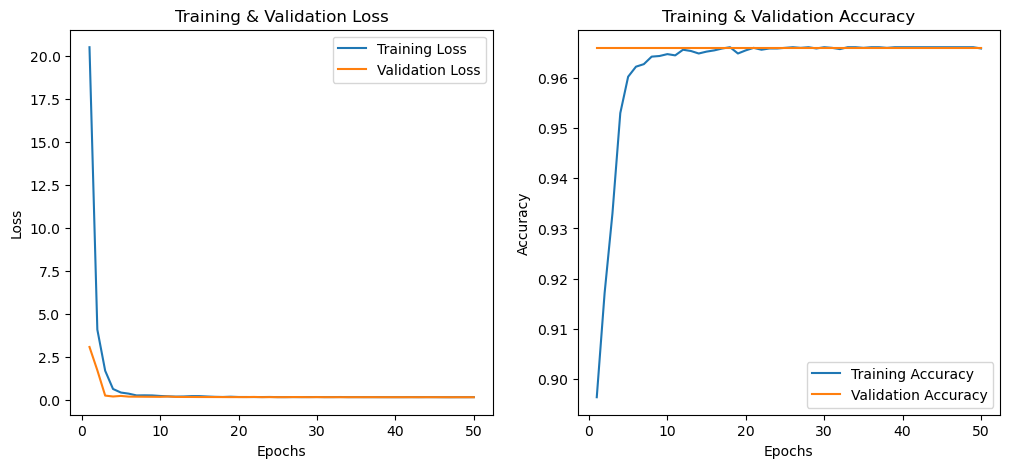

In [26]:

#on entraine le modèle
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Tracer la perte (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Tracer la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


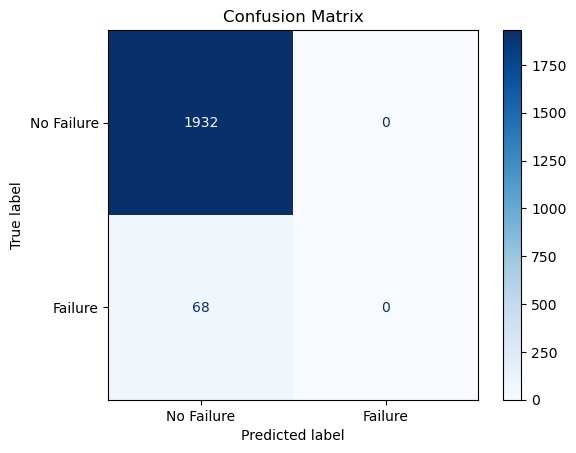

Classification Report:
               precision    recall  f1-score   support

  No Failure       0.97      1.00      0.98      1932
     Failure       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, display_labels=["No Failure", "Failure"], cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Afficher le rapport de classification
class_report = classification_report(Y_test, Y_pred, target_names=["No Failure", "Failure"])
print("Classification Report:\n", class_report)

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
Y = df["Machine failure"] 

# Séparer en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Appliquer le rebalancement des données (Oversampling avec SMOTE)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Standardiser les données
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"